In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [97]:
dataSet= pd.read_csv("Position_Salaries.csv")
dataSet.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [98]:
x = dataSet.iloc[:,1:-1].values
y= dataSet.iloc[:,-1].values


In [99]:
print("x looks like >>>>>")
print(x)
print("Y looks like >>>>>")
print(y)

x looks like >>>>>
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
Y looks like >>>>>
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [100]:
 y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [101]:
# Reshaping the Array concating the features and dependent variable
# np.concatenate((x.reshape(len(x),1),y.reshape(len(y),1)),1)



In [102]:
#SVR has not got an explicit equation like the previous regression models so as they have coeficients that compensate the high values of the features. 
# if there is nor an explicit equation for the model then we have to applu for a feature scalling
# check the values are in athe right range or nt if not you have to apply the feature scaling
# if the dependent variable get super high values to the features u have to put the dependent variable and the feature to the correct scale
# here we have use two objects seperately since once u fit the standardscaller it will set the mean to depending upon the provided data (s/y) so same object cannot be used 
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_y= StandardScaler()
y = sc_y.fit_transform(y)
x = sc_x.fit_transform(x)

In [103]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [104]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [106]:
# here we use kernals, kernals which are to learn linear relationships(linear kernals) and non linear relationships(non linear kernalls such as, guassian rpf kernal)
# SVR - support vector machines for regression mostly used one
# RBF - radial basis funcion kernal whcih is highly recomended using with the SVR model

from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

SVR()

In [107]:
# PRediction stge has some concerns...
# here in the previous stages, feature scalling was done to both x and y so that we need to make predicting input to stay in the scale so we need to make it even to the scaller using the same standard scaling object
# so as we need to make the return values to realistic values of y since for the moment we have scalled down the y
# so we need to use the same scalling object along with the inverse transform method

sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

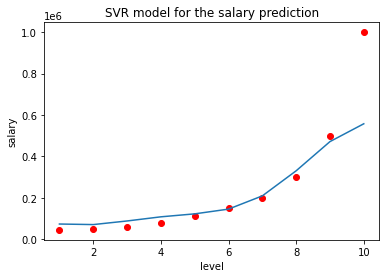

In [110]:
#  Visualization stage
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color="red")
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)))
plt.title("SVR model for the salary prediction")
plt.xlabel("level")
plt.ylabel("salary")
plt.show()

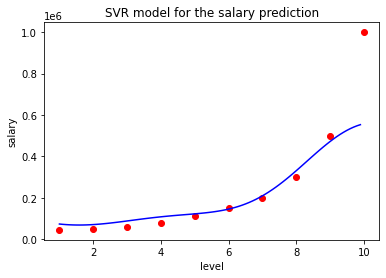

In [113]:
# Smoothning with high resolution for the code

x_grid = np.arange(min(sc_x.inverse_transform(x)),max(sc_x.inverse_transform(x)),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color="red")
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))),color="blue")
plt.title("SVR model for the salary prediction")
plt.xlabel("level")
plt.ylabel("salary")
plt.show()